In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:

plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'

In [3]:
kindle1 = pd.read_csv('ratings_Kindle_Store.csv')
kindle = kindle1.rename(columns={'A2GZ9GFZV1LWB0':'User', '1603420304':'Item', '4.0':'Rating'})

In [4]:

rating_list = kindle['User'].value_counts()
max_rating = np.amax(rating_list)
# rating_list.remove(max_rating)
sorted_list = rating_list.sort_values(ascending=False)
sorted_list

A13QTZ8CIMHHG4    2628
A320TMDV6KCFU     1980
A328S9RN3U5M68    1202
A2WZJDFX12QXKD    1148
A2G5IFYYHFIQNB    1133
A5JZNVV4TEAWU      979
A37LY77Q2YPJVL     976
A3PTWPKPXOG8Y5     951
A26J2TRDPZH7RZ     899
A3KI93AT8FAXI1     891
A3A7FF87LEVCQ1     818
A1JLU5H1CCENWX     806
A1E481YU3ZPK6S     756
A3LXRIY0HE71K      727
A2VXSQHJWZAQGY     724
A3EPHBMU07LZ50     717
A2JZCZYHNQHSCP     692
A1UFU1Q1KSSWIY     684
A3GSSX9XHONVCD     658
AR9RKLQQC2L6K      649
ANSX922QNYA67      643
A2YJ8VP1SSHJ7      622
A28REJAM6899K8     620
AFVQZQ8PW0L        613
ADDT2MU773IYL      612
A1E1LEVQ9VQNK      611
A20R37WRPLUM1D     609
A2ZJHEB8K8JZR3     601
A1DA6E4FNRSAWN     601
ANOSVLTGRKABQ      600
                  ... 
A1GQ2CYSRRTH6M       1
A2W8728Y9PO4C1       1
A26CLD0P9ML3J5       1
A203MV2H9X6IH9       1
A162C24RBF31M5       1
A2UJQF5WYF8M9B       1
A3T26TDX0ZEINP       1
AWBUMDF1XO50W        1
A3MYJ8I0WBLBD        1
A3FS9RGMLW77MD       1
A29XOYCEEOXYFK       1
A1KELIVWEB8LWB       1
A1LY1ZJTMUR

In [186]:
#Rating Chart for the Most Active User
most_rated = kindle[ kindle['User']== 'A2G5IFYYHFIQNB'] 
user_sort = most_rated.groupby('Item')
rating = user_sort.Rating.mean()
height1, bin_edge1 = np.histogram(rating, bins=bins)

#Rating Chart for Another Active User
sec_most_rated = kindle[ kindle['User']== 'A5JZNVV4TEAWU'] 
user_sort      = sec_most_rated.groupby('Item')
rating         = user_sort.Rating.mean()
height2, bin_edge2 = np.histogram(rating, bins=bins)


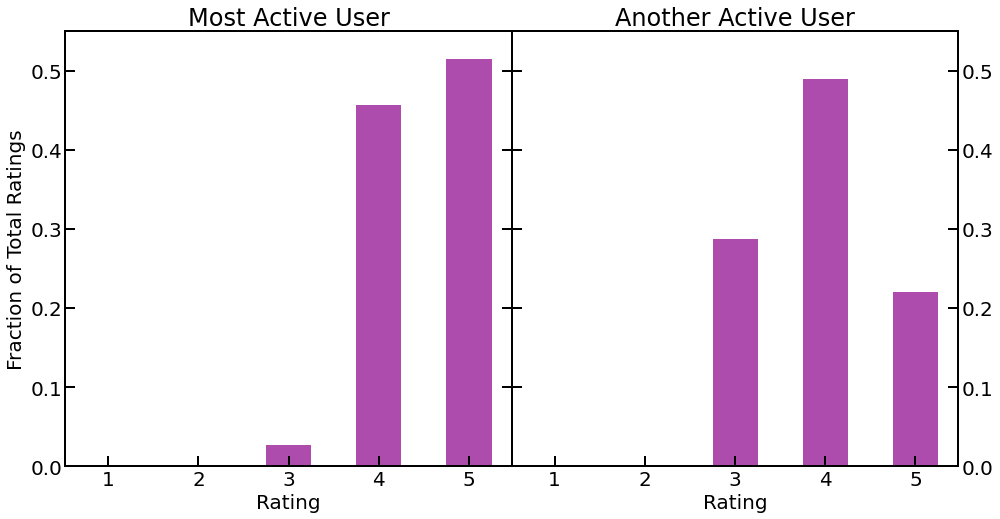

In [183]:
#Plotting Histograms for the two users
f, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(16,8))

ax[0].bar(bin_edge1[:-1], height1/np.sum(height1), width = 0.5, color='darkmagenta',alpha=0.7)
ax[1].bar(bin_edge2[:-1], height2/np.sum(height2), width = 0.5, color='darkmagenta',alpha=0.7)
ax[0].set_ylabel('Fraction of Total Ratings')
ax[0].set_title('Most Active User')
ax[1].set_title('Another Active User')
plt.setp(ax, 'ylim', (0.,0.55))
ax[0].tick_params('y', which='both', right=True, left=True, labelright=False, labelleft=True)
ax[1].tick_params('y', which='both', left=True, labelleft=False, labelright=True, right=True)
plt.setp(ax,'xlabel', 'Rating')
plt.savefig('user_histograms.pdf', bbox_inches='tight', dpi=160)